## K Nearest Neighbour

In [2]:
import pandas as pd
df=pd.read_csv('Zoo.csv')
df
print(df.isnull().sum())
print(df.dtypes)
df


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64
animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Preprocess the data by handling missing values & Outliers, if any

In [2]:
# checking any null values are present in it
print(df.dtypes,df.isnull().sum())

print(df.shape)
print(df.iloc[:,0].nunique())

# here we can see the 0 column 'animal name ' contain 100 unique value but total there are 101 values mean's one element is repeating 

# checking name contain any duplicate values
duplicates = df.duplicated(subset=['animal name'], keep=False)
df[duplicates]
# droping that row
df.drop_duplicates(subset=['animal name'], keep='first', inplace=True)
print(df.iloc[:,0].nunique())
print(df.shape)


animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64
(101, 18)
100
100
(100, 18)


## Data Visulization

<Axes: >

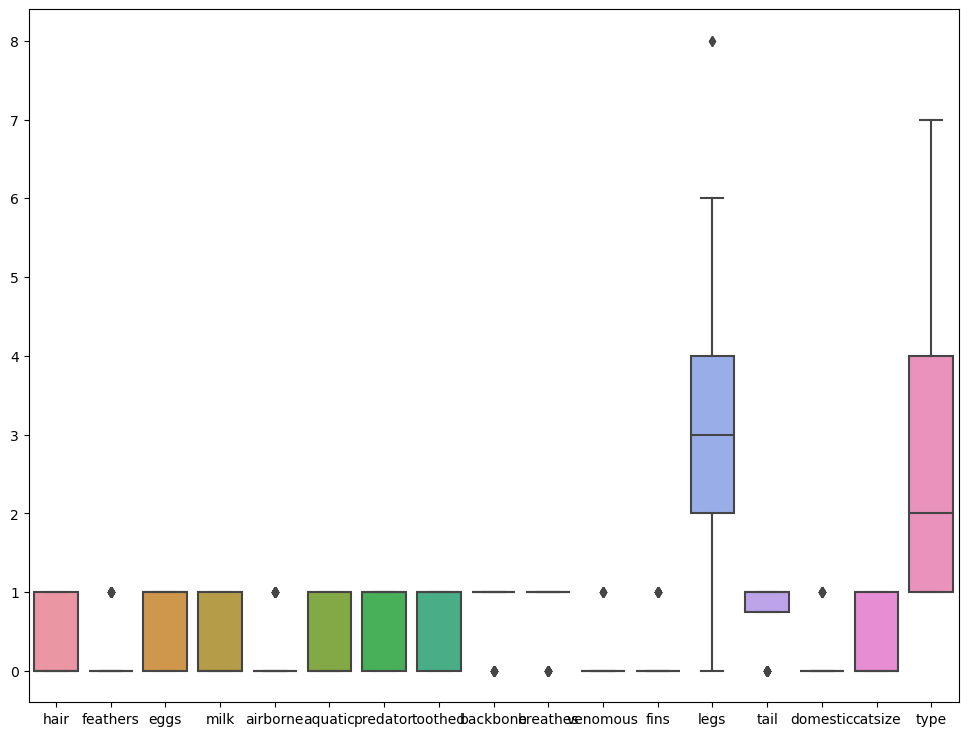

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(12,9))
sns.boxplot(df,ax=ax)


In [ ]:
# feathers,airborne,backbone,breathes,venomous,fins,legs,domestic are have outliers

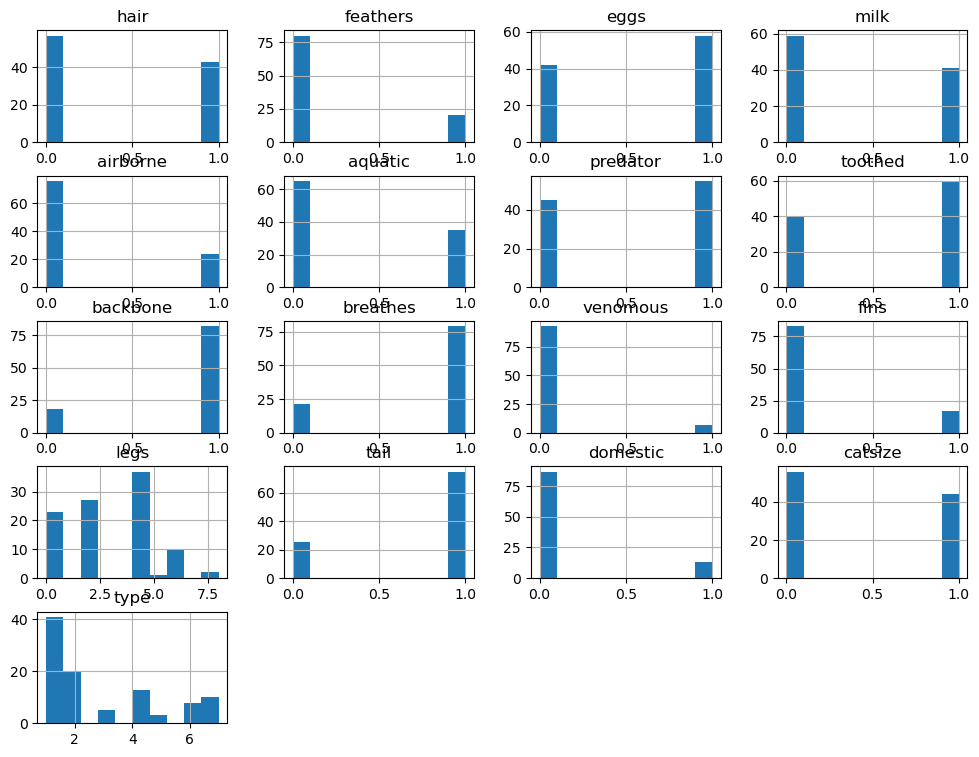

In [7]:
# Histogram
df.hist(figsize=(12,9))
plt.show()


# df.boxplot(figsize=(12,9))
# plt.show()

In [4]:

# Identify numerical columns
# numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# # Handle outliers using IQR method 
# for col in numerical_columns:
#   Q1 = df[col].quantile(0.25)
#   Q3 = df[col].quantile(0.75)
#   IQR = Q3 - Q1
#   lower_bound = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR
#   df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Check for remaining outliers
# df.describe()

# import numpy as np
# me=['feathers','airborne','backbone','breathes','venomous','fins','domestic']

# for i in me:
#     Q1 = np.percentile(df[i], 25)
#     Q3 = np.percentile(df[i], 75)
#     IQR = Q3 - Q1
#     upper_whisker = Q3 + 1.5 * IQR
#     lower_whisker = Q1 - 1.5 * IQR
#     mode = df[i].mode()
#     df.loc[df[i]<lower_whisker,i]=mode 
#     df.loc[df[i]>upper_whisker,i]=mode
#     df.fillna(mode[0], inplace=True)
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.43000,0.200000,0.580000,0.410000,0.240000,0.350000,0.55,0.600000,0.820000,0.79000,0.070000,0.170000,2.830000,0.750000,0.130000,0.440000,2.810000
std,0.49757,0.402015,0.496045,0.494311,0.429235,0.479372,0.50,0.492366,0.386123,0.40936,0.256432,0.377525,2.040276,0.435194,0.337998,0.498888,2.101923
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,1.00000,0.000000,0.000000,2.000000,0.750000,0.000000,0.000000,1.000000
50%,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.000000,1.00000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000
75%,1.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00,1.000000,1.000000,1.00000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.00000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [50]:
df.iloc[:,1:18].corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.434277,-0.816046,0.877637,-2.043147e-01,-0.467951,-0.148195,0.503017,0.196633,0.447809,-0.079958,-0.285535,0.401083,3.498557e-02,0.204810,0.450866,-0.558531
feathers,-0.434277,1.000000,0.425481,-0.416808,6.556101e-01,-0.052414,-0.100504,-0.612372,0.234261,0.257790,-0.137176,-0.226285,-0.204429,2.886751e-01,0.029735,-0.141019,-0.193651
eggs,-0.816046,0.425481,1.000000,-0.938420,3.833190e-01,0.369564,0.004073,-0.653451,-0.345957,-0.388996,0.074645,0.169366,-0.230950,-2.105587e-01,-0.153025,-0.511029,0.658967
milk,0.877637,-0.416808,-0.938420,1.000000,-3.732379e-01,-0.355941,-0.022478,0.639142,0.390567,0.429796,-0.228704,-0.160759,0.220042,1.995586e-01,0.161422,0.571804,-0.721456
airborne,-0.204315,0.655610,0.383319,-0.373238,1.000000e+00,-0.166907,-0.291804,-0.592657,-0.102389,0.289731,0.029366,-0.254322,0.047059,4.352464e-17,0.061269,-0.356606,0.028661
aquatic,-0.467951,-0.052414,0.369564,-0.355941,-1.669075e-01,1.000000,0.368748,0.042796,0.016371,-0.651143,0.045194,0.616748,-0.372313,-1.210455e-02,-0.221313,-0.101368,0.317284
predator,-0.148195,-0.100504,0.004073,-0.022478,-2.918043e-01,0.368748,1.000000,0.123091,0.047088,-0.268959,0.090598,0.195318,-0.105452,3.481553e-02,-0.307814,0.153878,0.052381
toothed,0.503017,-0.612372,-0.653451,0.639142,-5.926573e-01,0.042796,0.123091,1.000000,0.573819,-0.070162,-0.096003,0.369522,-0.199092,3.299832e-01,0.072836,0.353649,-0.484107
backbone,0.196633,0.234261,-0.345957,0.390567,-1.023891e-01,0.016371,0.047088,0.573819,1.000000,0.205774,-0.279523,0.212039,-0.436712,7.513914e-01,0.103712,0.362863,-0.839095
breathes,0.447809,0.257790,-0.388996,0.429796,2.897310e-01,-0.651143,-0.268959,-0.070162,0.205774,1.000000,-0.147224,-0.616347,0.368021,9.922343e-02,0.126297,0.209712,-0.528151


## Split the dataset into training and testing sets (80% training, 20% testing)

In [5]:

X=df.iloc[:,1:18]
Y=df.iloc[:,17]

# from the correlation we can drop feathers,airborne,backbone,breathes,venomous,fins,domestic
# X=X.drop(X.columns[[1,4,8,9,10,11,14]],axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


## . Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

train_accuracy_list=[]
test_accuracy_list=[]

for k in range(5,18,2):
    train_accuracy=[]
    test_accuracy=[]
    for i in range(1,200,1):
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=i)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,Y_train)
        y_pred_train=knn.predict(X_train)
        y_pred_test=knn.predict(X_test)
        train_accuracy.append(accuracy_score(Y_train, y_pred_train))
        test_accuracy.append(accuracy_score(Y_test, y_pred_test))
    train_accuracy_list.append(np.mean(train_accuracy).round(2))
    test_accuracy_list.append(np.mean(test_accuracy).round(2))
print('Training Accuracy ',train_accuracy_list)
print("Testing accuracy ",test_accuracy_list)


Training Accuracy  [0.96, 0.9, 0.85, 0.82, 0.82, 0.83, 0.83]
Testing accuracy  [0.89, 0.84, 0.82, 0.81, 0.81, 0.81, 0.81]


## Choose an appropriate distance metric and value for K

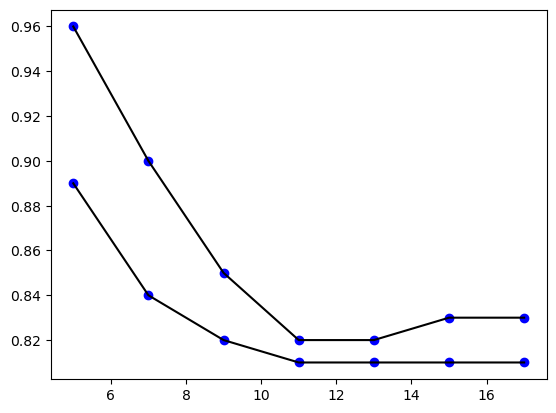

In [56]:
# finding the which kvalue is best by ploting 

plt.scatter(range(5,18,2),train_accuracy_list,color='Blue')
plt.plot(range(5,18,2),train_accuracy_list,color='Black')
plt.scatter(range(5,18,2),test_accuracy_list,color='Blue')
plt.plot(range(5,18,2),test_accuracy_list,color='Black')

# from the plot we can say that k=11,13 is best and the accuray score around 81%

## Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# model fiting by knn
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)

# Predict the labels for the test data
Y_pred_test=knn.predict(X_test)

# Calculate the accuracy for the test data
test_accuray = knn.score(X_test,Y_test)

# Print the training and test accuracies
print('Testing Accuracy',round(test_accuray,2))


from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(Y_test,Y_pred_test,average='weighted')
print("Precision:", precision.round(2))

# Calculate recall
recall = recall_score(Y_test,Y_pred_test,average='weighted')
print("Recall:", recall.round(2))

# Calculate F1-score
f1 = f1_score(Y_test,Y_pred_test,average='weighted')
print("F1-score:", f1.round(2))

Testing Accuracy 0.8
Precision: 0.68
Recall: 0.8
F1-score: 0.73


C:\Users\jalli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
# pip install mlxtend


##  Visualize the decision boundaries of the classifier.

100


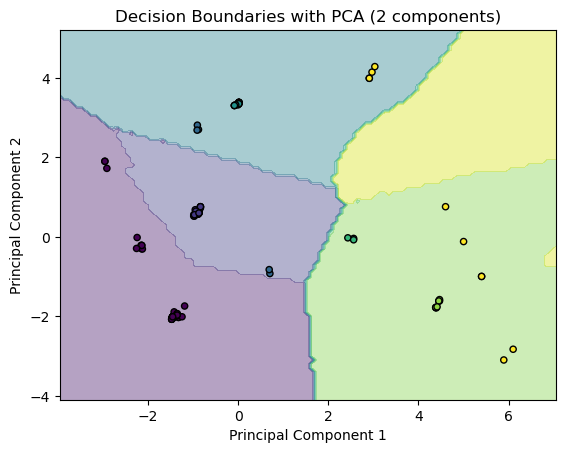

In [64]:
# # Visualize the decision boundaries of the classifier.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your data stored in X (features) and y (target variable)

# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_pca, Y)

# Create a meshgrid for visualization
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the labels for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, s=20, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries with PCA (2 components)')
plt.show()
